## Plotting total transported sediment and deposited trap weights 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

spring = pd.read_csv('../../data_analysis/sediment_load_analysis/transported_mass/total_mass_by_class/spring_transported_total_by_grainsize_summary.csv')
summer = pd.read_csv('../../data_analysis/sediment_load_analysis/transported_mass/total_mass_by_class/summer_transported_total_by_grainsize_summary.csv')

totals plotted against eachother

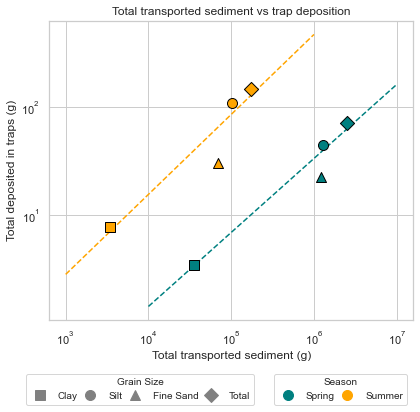

In [13]:
sns.set(style="whitegrid")

# custom markers per size class
markers = {'Clay': 's', 'Silt': 'o', 'Fine Sand': '^', 'Total': 'D'}
colors = {'Spring': 'teal', 'Summer': 'orange'}

# plotting
plt.figure(figsize=(6, 6))

# # add line of best fit
# sns.regplot(data=spring, x='SSC_integration', y='all_traps',
#             scatter=False, ci=None, line_kws={'linestyle': '--', 'color': colors['Spring'], 'zorder': 1})
# sns.regplot(data=summer, x='SSC_integration', y='all_traps',
#             scatter=False, ci=None, line_kws={'linestyle': '--', 'color': colors['Summer'], 'zorder': 1})

for season_name, df in [('Spring', spring), ('Summer', summer)]:
    for size_class in df['size_class']:
        if size_class == 'Silt + Clay':
            continue  # skip this row as it is not needed
        subset = df[df['size_class'] == size_class]
        plt.scatter(subset['SSC_integration'], subset['all_traps'], label=size_class, 
                    marker=markers[size_class], color=colors[season_name], s=100, edgecolor='black', zorder=2)
        

tempx1 = np.linspace(10e2, 10e5, 100) 
tempx2 = np.linspace(10e3, 10e6, 100)  
tempy_sm = 0.0165*tempx1**0.7434 # equation from excel
tempy_sp = 0.0025*tempx2**0.6879

plt.plot(tempx2, tempy_sp, linestyle='--', color=colors['Spring'], zorder=1, label='Spring Fit')
plt.plot(tempx1, tempy_sm, linestyle='--', color=colors['Summer'], zorder=1, label='Summer Fit')

# build custom legends
symbol_legend = [Line2D([0], [0], marker=markers[sc], color='gray', label=sc,
                        linestyle='None', markersize=10) for sc in markers.keys()]

color_legend = [
    Line2D([0], [0], marker='o', color=colors['Spring'], label='Spring',
            linestyle='None', markersize=10),
    Line2D([0], [0], marker='o', color=colors['Summer'], label='Summer',
            linestyle='None', markersize=10)]

# Log scale for x-axis
plt.xscale('log')
plt.yscale('log')

# Labels and title
plt.xlabel('Total transported sediment (g)')
plt.ylabel('Total deposited in traps (g)')
plt.title('Total transported sediment vs trap deposition')
plt.legend(title='Size Class')

# show custom legends
legend1 = plt.legend(handles=symbol_legend, title='Grain Size', loc='lower center', columnspacing=0.25,
                    bbox_to_anchor=(0.25, -0.3), ncol=4, frameon=True, fontsize='small', title_fontsize='small')

legend2 = plt.legend(handles=color_legend, title='Season', loc='lower center', columnspacing=0.25,
                    bbox_to_anchor=(0.8, -0.3), ncol=2, frameon=True, fontsize='small', title_fontsize='small')

plt.gca().add_artist(legend1)  # add back the first legend manually

plt.tight_layout()
plt.show()

by grain size class on the x axis

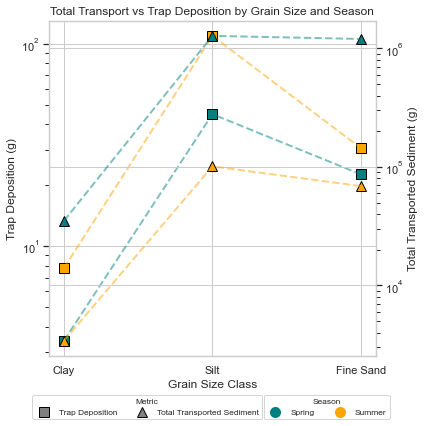

In [4]:
grain_classes = ['Clay', 'Silt', 'Fine Sand']
colors = {'Spring': 'teal', 'Summer': 'orange'}
markers = {'trap': 's', 'wc': '^'}

# figure and twin axis
fig, ax1 = plt.subplots(figsize=(6, 6))
ax2 = ax1.twinx()
# store handles for custom legends
handles_symbols = []
handles_colors = []

# function to plot for one season
def plot_season(ax1, ax2, df, season):
    x_vals = []
    trap_vals = []
    wc_vals = []
    for i, size in enumerate(grain_classes):
        row = df[df['size_class'] == size]
        if row.empty:
            continue
        x = i  # position for x-axis, instead of size class name
        trap = row['all_traps'].values[0]
        wc = row['SSC_integration'].values[0]
        # save for connecting lines
        x_vals.append(x)
        trap_vals.append(trap)
        wc_vals.append(wc)
        # plot trap deposition (left y-axis, circles)
        ax1.plot(x, trap, markers['trap'], color=colors[season], markersize=10, markeredgecolor='black')
        # plot SSC transport (right y-axis, triangles)
        ax2.plot(x, wc, markers['wc'], color=colors[season], markersize=10, markeredgecolor='black')
    # add connecting lines
    ax1.plot(x_vals, trap_vals, color=colors[season], linestyle='--', alpha=0.5, linewidth=2)
    ax2.plot(x_vals, wc_vals, color=colors[season], linestyle='--', alpha=0.5, linewidth=2)

# plot both seasons
plot_season(ax1, ax2, spring, 'Spring')
plot_season(ax1, ax2, summer, 'Summer')

# x-axis
ax1.set_xticks(range(len(grain_classes)))
ax1.set_xticklabels(grain_classes)
ax1.set_xlabel('Grain Size Class')
# y-axis
ax1.set_ylabel('Trap Deposition (g)')
ax2.set_ylabel('Total Transported Sediment (g)')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_title('Total Transport vs Trap Deposition by Grain Size and Season')

# legends
# shape legend (gray only)
handles_symbols = [
    Line2D([0], [0], marker='s', color='gray', linestyle='None', markersize=10, label='Trap Deposition', markeredgecolor='black'),
    Line2D([0], [0], marker='^', color='gray', linestyle='None', markersize=10, label='Total Transported Sediment', markeredgecolor='black')
]
# color legend (filled circle only)
handles_colors = [
    Line2D([0], [0], marker='o', color=colors['Spring'], linestyle='None', markersize=10, label='Spring'),
    Line2D([0], [0], marker='o', color=colors['Summer'], linestyle='None', markersize=10, label='Summer')
]
# add legends
legend1 = ax1.legend(handles=handles_symbols, title='Metric',
                    loc='lower center', bbox_to_anchor=(0.3, -0.2),
                    ncol=2, frameon=True, fontsize='small', title_fontsize='small')

legend2 = ax1.legend(handles=handles_colors, title='Season',
                    loc='lower center', bbox_to_anchor=(0.85, -0.2),
                    ncol=2, frameon=True, fontsize='small', title_fontsize='small')

ax1.add_artist(legend1)
plt.tight_layout()
plt.show()


### same as above, but cumulative

totals plotted against eachother

In [5]:
# spring
spring_cumulative = spring.iloc[:, 1:].cumsum()
spring_cumulative.insert(0, 'size_class', spring['size_class'])  # re-add size_class column
spring_cumulative = spring_cumulative[:-2] # drop the last two rows 

# summer
summer_cumulative = summer.iloc[:, 1:].cumsum()
summer_cumulative.insert(0, 'size_class', summer['size_class'])  # re-add size_class column
summer_cumulative = summer_cumulative[:-2] # drop the last two rows


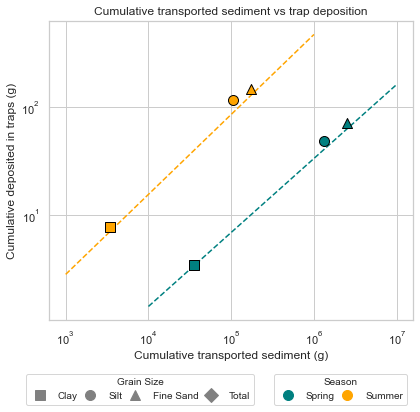

In [6]:
sns.set(style="whitegrid")
# custom markers per size class
markers = {'Clay': 's', 'Silt': 'o', 'Fine Sand': '^', 'Total': 'D'}
colors = {'Spring': 'teal', 'Summer': 'orange'}

# plotting
plt.figure(figsize=(6, 6))

# # add line of best fit
# sns.regplot(data=spring_cumulative, x='SSC_integration', y='all_traps',
#             scatter=False, ci=None, line_kws={'linestyle': '--', 'color': colors['Spring'], 'zorder': 1})
# sns.regplot(data=summer_cumulative, x='SSC_integration', y='all_traps',
#             scatter=False, ci=None, line_kws={'linestyle': '--', 'color': colors['Summer'], 'zorder': 1})

tempx1 = np.linspace(10e2, 10e5, 100)  # for line of best fit
tempx2 = np.linspace(10e3, 10e6, 100)  # for line of best fit
tempy_sm = 0.0165*tempx1**0.7434
tempy_sp = 0.0025*tempx2**0.6879

for season_name, df in [('Spring', spring_cumulative), ('Summer', summer_cumulative)]:
    for size_class in df['size_class']:
        if size_class == 'Silt + Clay':
            continue  # skip this row as it is not needed
        subset = df[df['size_class'] == size_class]
        plt.scatter(subset['SSC_integration'], subset['all_traps'], label=size_class, 
                    marker=markers[size_class], color=colors[season_name], s=100, edgecolor='black', zorder=2)

plt.plot(tempx2, tempy_sp, linestyle='--', color=colors['Spring'], zorder=1, label='Spring Fit')
plt.plot(tempx1, tempy_sm, linestyle='--', color=colors['Summer'], zorder=1, label='Summer Fit')

# build custom legends
symbol_legend = [Line2D([0], [0], marker=markers[sc], color='gray', label=sc,
                        linestyle='None', markersize=10) for sc in markers.keys()]

color_legend = [
    Line2D([0], [0], marker='o', color=colors['Spring'], label='Spring',
            linestyle='None', markersize=10),
    Line2D([0], [0], marker='o', color=colors['Summer'], label='Summer',
            linestyle='None', markersize=10)]

# Log scale for x-axis
plt.xscale('log')
plt.yscale('log')  

# Labels and title
plt.xlabel('Cumulative transported sediment (g)')
plt.ylabel('Cumulative deposited in traps (g)')
plt.title('Cumulative transported sediment vs trap deposition')
plt.legend(title='Size Class')

# show custom legends
legend1 = plt.legend(handles=symbol_legend, title='Grain Size', loc='lower center', columnspacing=0.25,
                    bbox_to_anchor=(0.25, -0.3), ncol=4, frameon=True, fontsize='small', title_fontsize='small')

legend2 = plt.legend(handles=color_legend, title='Season', loc='lower center', columnspacing=0.25,
                    bbox_to_anchor=(0.8, -0.3), ncol=2, frameon=True, fontsize='small', title_fontsize='small')

plt.gca().add_artist(legend1)  # add back the first legend manually

plt.tight_layout()
plt.show()

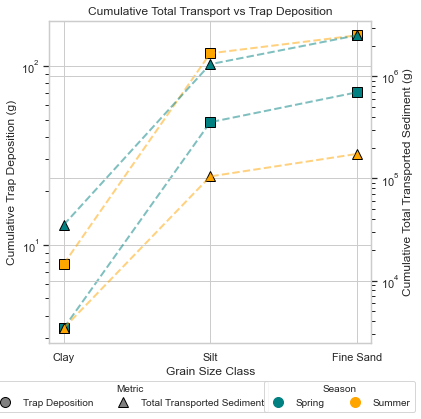

In [15]:
# figure and twin axis
grain_classes = ['Clay', 'Silt', 'Fine Sand']
colors = {'Spring': 'teal', 'Summer': 'orange'}
markers = {'trap': 's', 'wc': '^'}

# figure and twin axis
fig, ax1 = plt.subplots(figsize=(6, 6))
ax2 = ax1.twinx()
# store handles for custom legends
handles_symbols = []
handles_colors = []

# plot both seasons
plot_season(ax1, ax2, spring_cumulative, 'Spring')
plot_season(ax1, ax2, summer_cumulative, 'Summer')

# x-axis
ax1.set_xticks(range(len(grain_classes)))
ax1.set_xticklabels(grain_classes)
ax1.set_xlabel('Grain Size Class')
# y-axis
ax1.set_ylabel('Cumulative Trap Deposition (g)')
ax2.set_ylabel('Cumulative Total Transported Sediment (g)')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_title('Cumulative Total Transport vs Trap Deposition')

# legends
# shape legend (gray only)
handles_symbols = [
    Line2D([0], [0], marker='o', color='gray', linestyle='None', markersize=10, label='Trap Deposition', markeredgecolor='black'),
    Line2D([0], [0], marker='^', color='gray', linestyle='None', markersize=10, label='Total Transported Sediment', markeredgecolor='black')
]
# color legend (filled circle only)
handles_colors = [
    Line2D([0], [0], marker='o', color=colors['Spring'], linestyle='None', markersize=10, label='Spring'),
    Line2D([0], [0], marker='o', color=colors['Summer'], linestyle='None', markersize=10, label='Summer')
]
# add legends
legend1 = ax1.legend(handles=handles_symbols, title='Metric',
                    loc='lower center', bbox_to_anchor=(0.25, -0.23),
                    ncol=2, frameon=True, fontsize='small', title_fontsize='small')

legend2 = ax1.legend(handles=handles_colors, title='Season',
                    loc='lower center', bbox_to_anchor=(0.9, -0.23),
                    ncol=2, frameon=True, fontsize='small', title_fontsize='small')

ax1.add_artist(legend1)
plt.tight_layout()
plt.show()

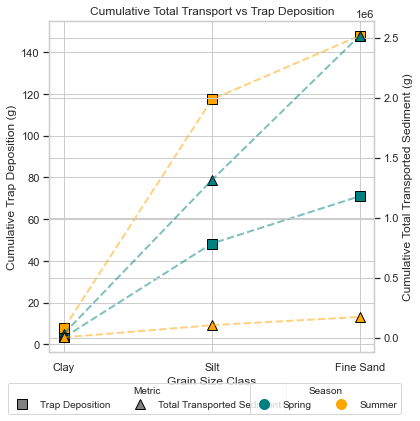

In [11]:
# figure and twin axis
fig, ax1 = plt.subplots(figsize=(6, 6))
ax2 = ax1.twinx()
# store handles for custom legends
handles_symbols = []
handles_colors = []

# plot both seasons
plot_season(ax1, ax2, spring_cumulative, 'Spring')
plot_season(ax1, ax2, summer_cumulative, 'Summer')

# x-axis
ax1.set_xticks(range(len(grain_classes)))
ax1.set_xticklabels(grain_classes)
ax1.set_xlabel('Grain Size Class')
# y-axis
ax1.set_ylabel('Cumulative Trap Deposition (g)')
ax2.set_ylabel('Cumulative Total Transported Sediment (g)')
#ax1.set_yscale('log')
#ax2.set_yscale('log')
ax1.set_title('Cumulative Total Transport vs Trap Deposition')

# legends
# shape legend (gray only)
handles_symbols = [
    Line2D([0], [0], marker='s', color='gray', linestyle='None', markersize=10, label='Trap Deposition', markeredgecolor='black'),
    Line2D([0], [0], marker='^', color='gray', linestyle='None', markersize=10, label='Total Transported Sediment', markeredgecolor='black')
]
# color legend (filled circle only)
handles_colors = [
    Line2D([0], [0], marker='o', color=colors['Spring'], linestyle='None', markersize=10, label='Spring'),
    Line2D([0], [0], marker='o', color=colors['Summer'], linestyle='None', markersize=10, label='Summer')
]
# add legends
legend1 = ax1.legend(handles=handles_symbols, title='Metric',
                    loc='lower center', bbox_to_anchor=(0.3, -0.2),
                    ncol=2, frameon=True, fontsize='small', title_fontsize='small')

legend2 = ax1.legend(handles=handles_colors, title='Season',
                    loc='lower center', bbox_to_anchor=(0.85, -0.2),
                    ncol=2, frameon=True, fontsize='small', title_fontsize='small')

ax1.add_artist(legend1)
plt.tight_layout()
plt.show()